# Hands-on 01: Online retail - RFM

## Concepts

Segmentation is the technique to uncover information, by **Categorizing and understandings**. By segmenting customer, we can compare and tailor the treatment for each segment (for example: different pricing, promotions, product placement)

### Customer Segmentation

> The general principal of segmentation is to split the population into subgroups by various customer attributes, so that (we hope) the members within a subgroup share something common, and between subgroups we hope to see some differences in patterns. 

> *For example*: 
> Split by age, so member in young ages are expected to behave similarly. While the behaviors of young ages are different from the group of middle age.

- When segmenting the customer base into subgroups, we can use metrics that represent characteristics and their statistics to describe and compare among groups
- Segmentation could start with some arbitrary subgroups: demographic info (age, gender), geographic infor (state, post code), behaviors (transactions). For example:
	- Segment by States as in  - Distribution of `yearly_amount_spent` by states
    - Convert numerical variable `length_of_membership` to high-mid-low bin and compare the `yearly_amount_spent`
    - Segment clients by `age_group` and compare `conversion_rate`
    - Segment clients by `marital` and compare `conversions`
    - Segment clients by both `education` and `marital` to compare `conversions`
- It could become exponentially difficult, when the number of attributes to segment users increases (that we can use some Machine Learning for the task of customer segmentation)

### Objectives

Segmentation can help a business in multitude of ways:
- `Customer Understanding`: deeper understandings about customers, their attributes and behaviors
- `Target Marketing`: enable the business to focus marketing effort effectively and efficiently
- `Optimal Product Placement`: good segmentation strategy will help the business to develop and offer new products
- `Categorize customers`: high revenue customers for better advantages, untapped customers, loyal customers.

## RFM Model

In the topic of Segmentation, we will introduce the RFM model, which is a popular model in marketing and customer segmentation for determining Customer Value (CV).


### What's R, F, M?

RFM segments customers by 3 important features:

1. `Recency`: to measure how recent the last interaction with a customer
2. `Frequency`: how frequent a customer interact with the business
3. `Monetary`: the monetary value a customer generate

Normally, each element in `R`, `F`, `M` will be assigned a score from 1-5 (5 as the best), or value of low, mid, high. 
	- So that, the customer with `RFM score = 555` (R=5, F=5, M=5) will be very recently active, purchase frequently and strong purchasing power - 'spender' (high R, high F, high M) -> Most important group of users
	- On the other hand, `RFM score = 111` are customers who buy only one very cheap product for a long time ago.

### Discretization/Splits
- Notice that when we compute the R, F, M from the data (we will see in details in this notebook), they are numerical values
	- For example of `Frequency` (as below), we count times of purchases, having value from 0 to 25. Then, we need to split them into 5 bins
	- How to do it?
- There are several ways to discretize R, F, M into bins:
	- Percentiles or quantiles 
	- Pareto Rule - 80/20: Split into `<80th percentiles`, and `>=80th percentiles`
	- Arbitrary/Expert Split (based on business acumen and experience)
	
- The number of splits are up to the DA (and inputs from business). We can also split by low/mid/high. 
	- From that, we will have a matrix as below, to classify customers into different groups, based on the combination of their segments in each factor of RFM


### RFM Variants

Notice that you do not need to stick with the classic RFM, there are multiple variants (you can also create one variants from your creativity):

- `RFD`: Recency, Frequency, Duration (for viewership/streaming business, such as Youtube, Spotify)
- `RFE`: Recency, Frequency, Engagement - A broader version, where Engagement is up to the design of business/DA
- `RFMTC`: Recency, Frequency, Monetary Value, Time, Churn rate - Augmented model


Go through the notebook and fill in TODO part (Google might help you along the way). 
**There are 09 in total**.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns 
import pandas as pd 
import missingno

In [2]:
# OPTIONA:
import warnings
warnings.filterwarnings('ignore')

## Load Data

In [4]:
df = pd.read_excel('data/Online Retail.xlsx', dtype={'CustomerID': str})

In [5]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [6]:
# Create the order_value
df['order_value'] = df.Quantity * df.UnitPrice 

In [8]:
df['order_value'].head()

0    15.30
1    20.34
2    22.00
3    20.34
4    20.34
Name: order_value, dtype: float64

## Data Explore

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  object        
 7   Country      541909 non-null  object        
 8   order_value  541909 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 37.2+ MB


### Missing Values


Preview of data with null values:
     InvoiceNo StockCode                      Description  Quantity  \
622     536414     22139                              NaN        56   
1443    536544     21773  DECORATIVE ROSE BATHROOM BOTTLE         1   
1444    536544     21774  DECORATIVE CATS BATHROOM BOTTLE         2   

             InvoiceDate  UnitPrice CustomerID         Country  order_value  
622  2010-12-01 11:52:00       0.00        NaN  United Kingdom         0.00  
1443 2010-12-01 14:32:00       2.51        NaN  United Kingdom         2.51  
1444 2010-12-01 14:32:00       2.51        NaN  United Kingdom         5.02  
(135080, 9)


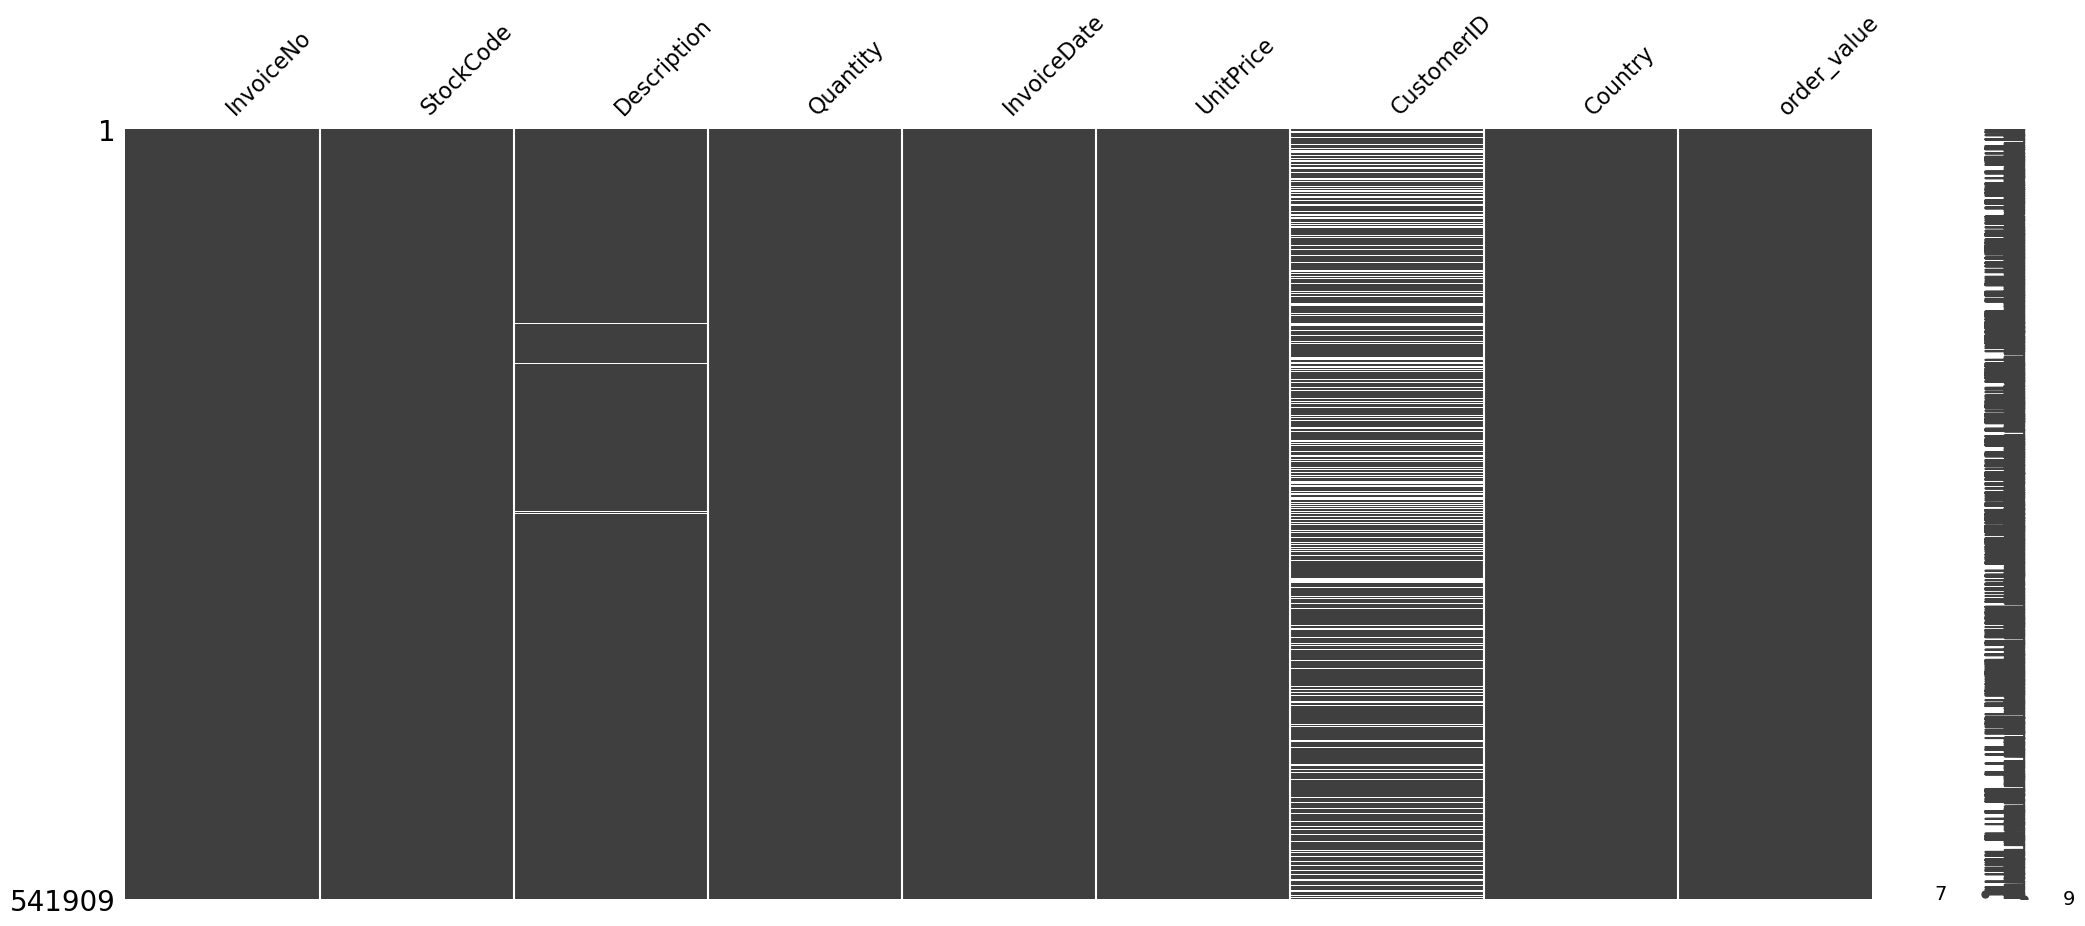

In [10]:
## generate preview of entries with null values
print("\nPreview of data with null values:")
print('='*10)
print(df[df.isnull().any(axis=1)].head(3))
print(df[df.isnull().any(axis=1)].shape)
missingno.matrix(df)
plt.show()

In [11]:
# drop na
df1 = df.dropna()
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  object        
 7   Country      406829 non-null  object        
 8   order_value  406829 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 31.0+ MB


### Outliers

In [12]:
df1.describe([0.01,0.05,0.25,0.50, 0.75, 0.90,0.95,0.99]).T

,count,mean,std,min,1%,5%,25%,50%,75%,90%,95%,99%,max
Quantity,406829.0,12.061303,248.693370,-80995.0,-2.00,1.00,2.00,5.00,12.00,24.00,36.0,120.00,80995.0
UnitPrice,406829.0,3.460471,69.315162,0.0,0.21,0.42,1.25,1.95,3.75,6.75,8.5,15.00,38970.0
order_value,406829.0,20.401854,427.591718,-168469.6,-9.90,0.85,4.20,11.10,19.50,35.40,67.2,199.68,168469.6


In [ ]:
# TODO_01: Explore the distribution by hist or describe
# Filter outlier on quantity and order values

In [14]:
q_cap_90 = df['Quantity'].quantile(0.95)
order_val_cap_90 = df['order_value'].quantile(0.95)

In [15]:
q_flr = 0
q_cap = q_cap_90
order_val_cap = order_val_cap_90

df1 = df1[df1.Quantity >= q_flr]
df1.describe([0.01,0.05,0.25,0.50, 0.75, 0.90,0.95,0.99]).T

,count,mean,std,min,1%,5%,25%,50%,75%,90%,95%,99%,max
Quantity,397924.0,13.021823,180.420210,1.0,1.00,1.00,2.00,6.00,12.00,24.00,36.0,120.00,80995.00
UnitPrice,397924.0,3.116174,22.096788,0.0,0.21,0.42,1.25,1.95,3.75,6.35,8.5,14.95,8142.75
order_value,397924.0,22.394749,309.055588,0.0,0.55,1.25,4.68,11.80,19.80,35.40,67.5,202.50,168469.60


In [16]:
df1 = df1[(df1.Quantity < q_cap) & (df1.order_value < order_val_cap)]
df1.describe([0.01,0.05,0.25,0.50, 0.75, 0.90,0.95,0.99]).T

,count,mean,std,min,1%,5%,25%,50%,75%,90%,95%,99%,max
Quantity,363409.0,6.848388,6.546333,1.0,1.00,1.00,2.00,4.00,12.00,12.00,24.0,25.00,28.00
UnitPrice,363409.0,2.862839,3.082083,0.0,0.29,0.42,1.25,1.95,3.75,5.95,8.5,14.95,57.95
order_value,363409.0,12.296227,9.945648,0.0,0.55,1.25,4.16,10.20,17.34,25.00,32.7,46.80,59.40


## Create RFM Score

### Recency

`TODO_02`: How we define Recency? Add as markdown notes below

~> Your comment

In [17]:
# First, detect the most recent day in the datasets
print("Min Date", df1["InvoiceDate"].min(), "\nMax Date", df1["InvoiceDate"].max())

Min Date 2010-12-01 08:26:00 
Max Date 2011-12-09 12:50:00


In [18]:
r_series = (df1["InvoiceDate"].max() - df1.groupby("CustomerID").agg({"InvoiceDate":"max"})).rename(columns = {"InvoiceDate":"Recency"})
r_series['Recency'] = r_series['Recency'].apply(lambda x: x.days) # Use apply to map the function (lambda) to all elements of the series
r_series.head()

,Recency
CustomerID,
12347,1
12348,74
12349,18
12350,309
12352,35


array([[<AxesSubplot:title={'center':'Recency'}>]], dtype=object)

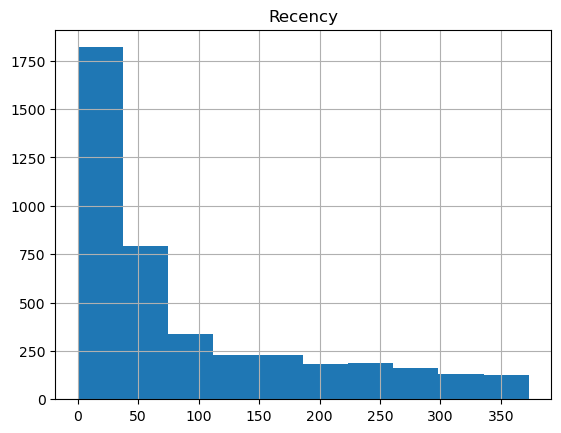

In [19]:
r_series.hist()

### Frequency

`TODO_03`: How we define Frequency? Add as markdown notes below

~> Your comment

In [20]:
f_series = df1.groupby("CustomerID").agg({"InvoiceDate":"nunique"}).rename(columns={"InvoiceDate": "Frequency"})
f_series.head()

,Frequency
CustomerID,
12347,7
12348,4
12349,1
12350,1
12352,7


array([[<AxesSubplot:title={'center':'Frequency'}>]], dtype=object)

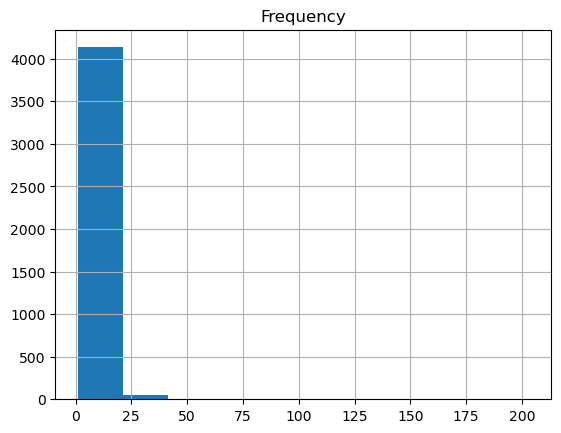

In [21]:
f_series.hist()

In [22]:
# TODO_04: 
# Why we need to treat outliers below? What we did? 
# What happened if we don't treat outliers

cut_95 = f_series.Frequency.quantile(0.95)
outliers = f_series[f_series.Frequency > cut_95].shape
print('Above p95 of {}: {} obs.'.format(cut_95, outliers))

Above p95 of 12.0: (202, 1) obs.


array([[<AxesSubplot:title={'center':'Frequency'}>]], dtype=object)

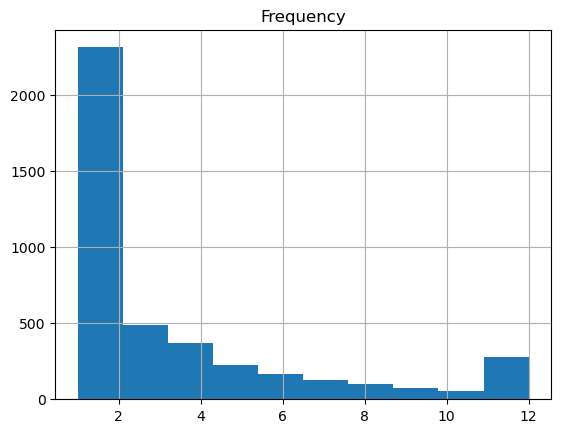

In [23]:
f_series[f_series.Frequency > cut_95] = cut_95 ## Replace the one > p95, by 95 value
f_series.hist()

### Monetary

`TODO_05`: How we define Monetary? Add as markdown notes below

~> Your comment

In [24]:
## We can either choose to sum or average the value of orders (Try the sum this time)
m_series = df1.groupby("CustomerID").agg({"order_value":"sum"}).rename(columns={"order_value":"Monetary"})
m_series.head()

,Monetary
CustomerID,
12347,3398.48
12348,210.20
12349,1244.35
12350,334.40
12352,1505.74


array([[<AxesSubplot:title={'center':'Monetary'}>]], dtype=object)

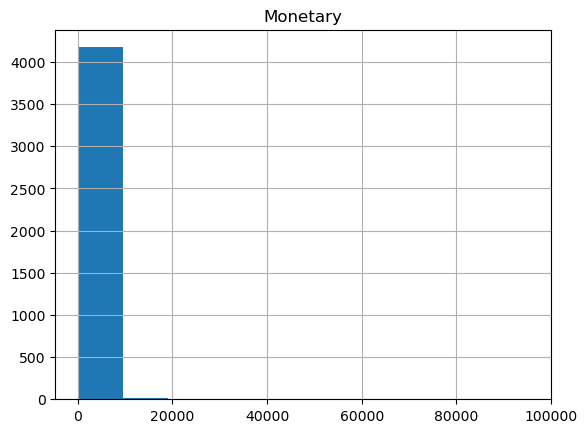

In [25]:
m_series.hist()

In [26]:
cut_95 = m_series.Monetary.quantile(0.95)
outliers = m_series[m_series.Monetary > cut_95].shape
print('Above p95 of {}: {} obs.'.format(cut_95, outliers))

Above p95 of 3690.3559999999993: (210, 1) obs.


array([[<AxesSubplot:title={'center':'Monetary'}>]], dtype=object)

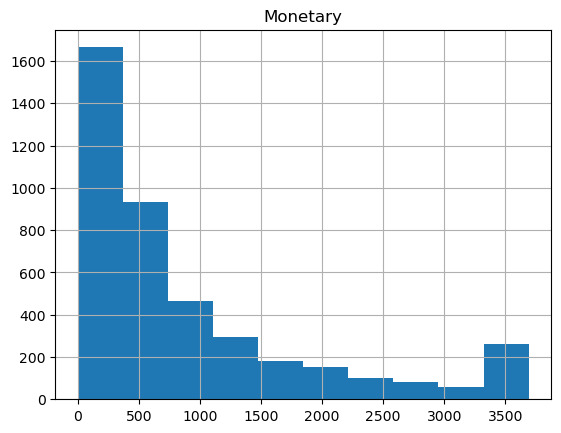

In [27]:
m_series[m_series.Monetary > cut_95] = cut_95 ## Replace the one > p95, by 95 value
m_series.hist()

### RFM Score

1. Concat `Recency`, `Frequency`, `Monetary`
2. Bin each element to 5 bins (equivalent to 5-level scale) -> `R_Score`, `F_Score`, `M_Score`
3. Combine `R_Score`, `F_Score`, `M_Score` into `RFM_SCORE`

> Notice that: `RFM_SCORE` and element scores are categorical.

In [28]:
rfm = pd.concat([r_series, f_series, m_series], axis=1)
rfm.head()

,Recency,Frequency,Monetary
CustomerID,,,
12347,1,7,3398.48
12348,74,4,210.20
12349,18,1,1244.35
12350,309,1,334.40
12352,35,7,1505.74


In [29]:
## Bin the R, F, M into 5 bins by percentiles
rfm['R_Score'] = pd.qcut(rfm['Recency'], 5, labels = [5, 4, 3, 2, 1]) ## score is reverse, as smaller Recency (days) is better
rfm['F_Score'] = pd.cut(rfm['Frequency'], 5, labels = [1, 2, 3, 4, 5], duplicates='drop') ## bin edges not unique, due to the skewed distribution
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 5, labels = [1, 2, 3, 4, 5],duplicates='drop')
rfm.head()

,Recency,Frequency,Monetary,R_Score,F_Score,M_Score
CustomerID,,,,,,
12347,1,7,3398.48,5,3,5
12348,74,4,210.20,2,2,2
12349,18,1,1244.35,4,1,4
12350,309,1,334.40,1,1,2
12352,35,7,1505.74,3,3,5


In [30]:
## Generate the RFM Scores
# RFM Scores: Category
rfm["RFM_SCORE"] = (rfm['R_Score'].astype(str) + 
                     rfm['F_Score'].astype(str) + 
                     rfm['M_Score'].astype(str))

rfm.head()

,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_SCORE
CustomerID,,,,,,,
12347,1,7,3398.48,5,3,5,535
12348,74,4,210.20,2,2,2,222
12349,18,1,1244.35,4,1,4,414
12350,309,1,334.40,1,1,2,112
12352,35,7,1505.74,3,3,5,335


## RFM Analysis

### Distribution by RFM Score

1. First, we check the distribution of Value (`Monetary`) by all `RFM_SCORE` we have by boxplot
	- Have up to 85 possible values of `RFM_SCORE` combinations of R, F, M 
	- This number of categories makes it not visible to obtain the insights -> Strategies to reduce the groups 

> Discussion: Why 85, but not 5 x 5 x 5 = 125?

<AxesSubplot:xlabel='RFM_SCORE', ylabel='Monetary'>

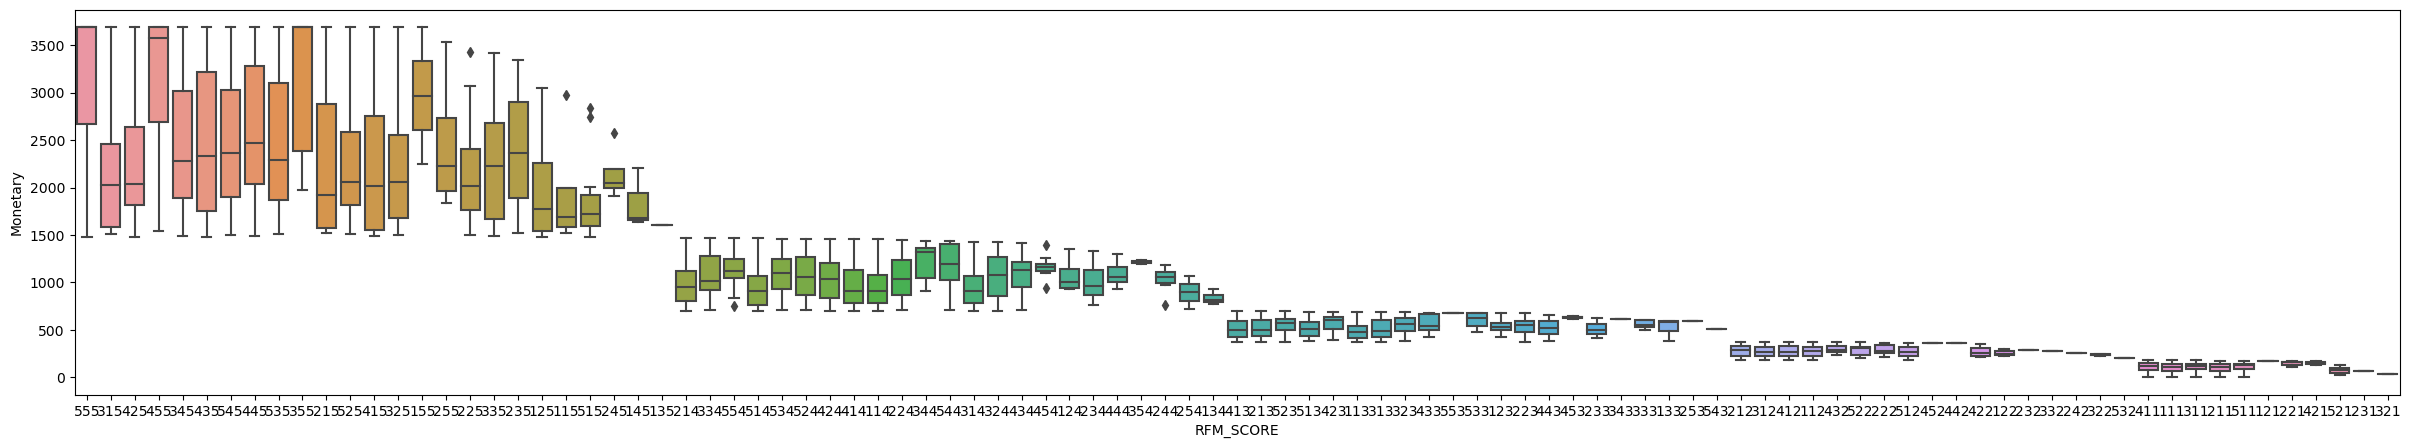

In [31]:
plt.figure(figsize=(30, 5))
sns.boxplot(x='RFM_SCORE', y='Monetary', data=rfm.sort_values(by='Monetary',ascending=False))

In [32]:
len(rfm.RFM_SCORE.unique())

97

In [33]:
ls = []
for r in [1, 2, 3, 4, 5]:
  for f in [1, 2, 3, 4, 5]:
    for m in [1, 2, 3, 4, 5]:
      out = str(r) + str(f) + str(m)
      ls.append(out)

In [34]:
len(ls)

125

In [ ]:
# for e in ls:
#   if e not in rfm.RFM_SCORE.unique():
#     print(e)

# Or better way (list comprehensive): [e for e in ls if e not in rfm.RFM_SCORE.unique()]

### Distribution by RFM-based Segments

Next, We can either: 

- Group values in `RFM_SCORE` by business acumen (WHAT WE DO BEFLOW)
- Clustering with Kmenas

Below, we only use 2 elements R,F to segments and M as the aggregate metrics

In [35]:
## With all 3 elements, there are many segments to focus. Let's segment by R, F only (keep M for comparison)
seg_map = {
    r'[1-2][1-2]': 'Hibernating', ## Recency =< 2, Bad Frequency =< 2
    r'[1-2][3-4]': 'At Risk', ## Bad Recency =< 2, Mid Frequency from 3-4
    r'[1-2]5': 'Can\'t Loose', 
    r'3[1-2]': 'About to Sleep',
    r'33': 'Need Attention',
    r'[3-4][4-5]': 'Loyal Customers',
    r'41': 'Promising',
    r'51': 'New Customers',
    r'[4-5][2-3]': 'Potential Loyalists',
    r'5[4-5]': 'Champions'
}

rfm['Segment'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) ## Notice that, here we only consider R, F => M is the value to summary
rfm['Segment'] = rfm['Segment'].replace(seg_map, regex=True)

<AxesSubplot:xlabel='Segment', ylabel='Monetary'>

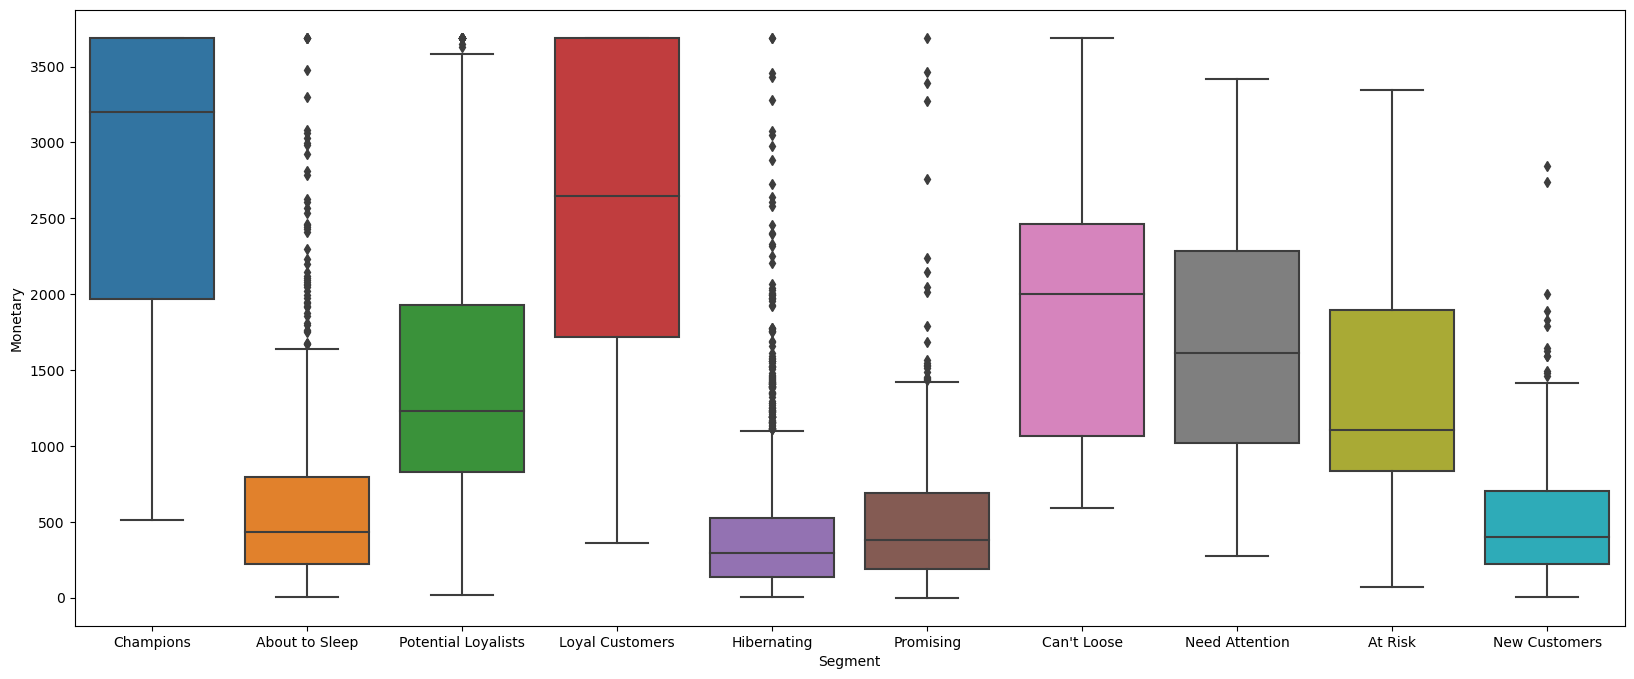

In [36]:
plt.figure(figsize=(20, 8))
sns.boxplot(x='Segment', y='Monetary', data=rfm.sort_values(by='Monetary',ascending=False))

In [2]:
# TODO_06: Comment the insights from the boxplot 

### Deep-dive in each components

<AxesSubplot:xlabel='R_Score', ylabel='Frequency'>

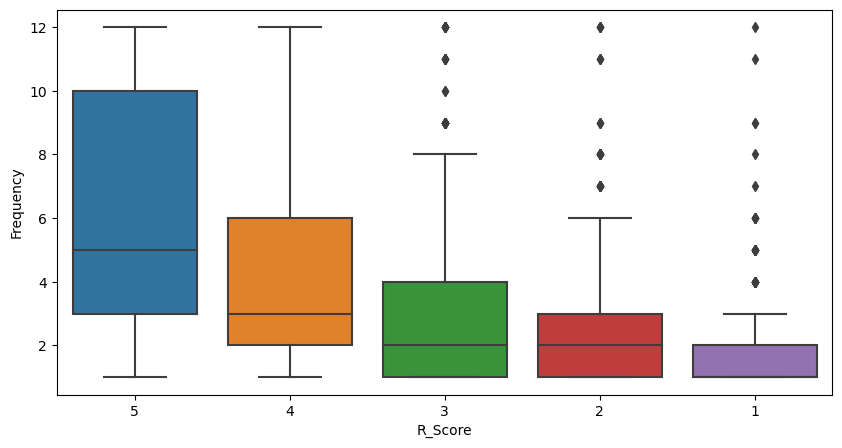

In [37]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='R_Score', y='Frequency', data=rfm)

In [ ]:
# TODO_07: Comment the insights from boxplot 

<AxesSubplot:xlabel='F_Score', ylabel='Monetary'>

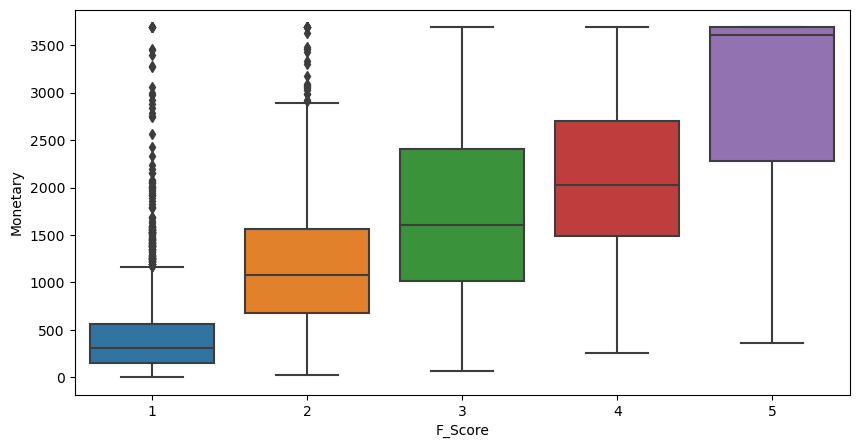

In [38]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='F_Score', y='Monetary', data=rfm)

In [ ]:
# TODO_08: Comment the insights from boxplot 

### Aggregates by Segments

In [39]:
rfmStats = rfm[["Segment","Recency","Frequency", "Monetary"]].groupby("Segment").agg(["mean","median","count", "std"])
rfmStats.columns = rfmStats.columns.map('_'.join).str.strip('|')
rfmStats

,Recency_mean,Recency_median,Recency_count,Recency_std,Frequency_mean,Frequency_median,Frequency_count,Frequency_std,Monetary_mean,Monetary_median,Monetary_count,Monetary_std
Segment,,,,,,,,,,,,
About to Sleep,51.091292,51.0,712,10.844838,2.178371,2.0,712,1.267547,637.762885,436.215,712,629.868962
At Risk,125.803922,105.0,51,55.926387,6.882353,6.0,51,1.051609,1344.979020,1105.070,51,789.844608
Can't Loose,145.777778,113.0,9,96.115527,11.555556,12.0,9,0.527046,2016.599556,2003.270,9,1118.435087
Champions,4.392617,3.0,298,3.646438,10.812081,12.0,298,1.541214,2826.309040,3203.120,298,942.953599
Hibernating,193.343459,183.0,1613,89.485841,1.693118,1.0,1613,1.012666,423.481522,292.440,1613,457.120530
Loyal Customers,28.076087,23.5,184,13.740955,10.065217,10.0,184,1.618232,2580.508152,2646.045,184,1001.723470
Need Attention,47.803279,49.0,61,9.639882,6.409836,6.0,61,0.495885,1720.331475,1610.750,61,819.902162
New Customers,6.003676,6.0,272,3.682509,2.040441,2.0,272,0.730352,524.466985,399.370,272,431.479667
Potential Loyalists,13.843284,13.0,536,9.606349,5.167910,5.0,536,1.104695,1472.512629,1231.460,536,883.491977


### Treemap

In [40]:
!pip install squarify

In [41]:
import squarify # pip install squarify

In [42]:
rfm.Segment.value_counts()

Hibernating            1613
About to Sleep          712
Potential Loyalists     536
Promising               459
Champions               298
New Customers           272
Loyal Customers         184
Need Attention           61
At Risk                  51
Can't Loose               9
Name: Segment, dtype: int64

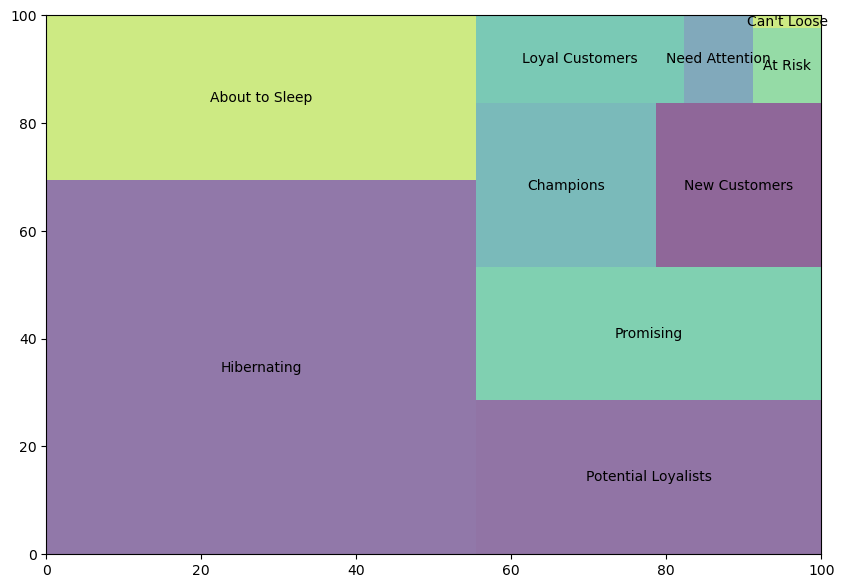

In [43]:
df_plot = rfm.Segment.value_counts()
plt.figure(figsize=(10, 7))
squarify.plot(df_plot, label=df_plot.index, alpha=0.6)
plt.show()

In [ ]:
# TODO_09: Comment the insights from treemap